In [17]:
%reset -f

In [18]:
import glob
import uproot
from dataclasses import dataclass

import numpy as np
import pandas as pd

import multiprocessing
from numba import njit
from tqdm import tqdm

import matplotlib.pyplot as plt

In [19]:
nTuple_dir_list = [glob.glob("/root/data/qe-stkorn-v2/*/*.root")[0]]
print(nTuple_dir_list)
# debug
with uproot.open(nTuple_dir_list[0], mode="r") as file:
    print(file["reco;1"].keys(), end="\n\n")
    print(file["truth;1"].keys())

['/root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13145_p6490.121124-v2_output/user.stkorn.42053512._000001.output.root']
['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'weight_beamspot', 'eventNumber', 'mcChannelNumber', 'runNumber', 'trigPassed_HLT_e120_lhloose', 'trigPassed_HLT_e140_lhloose_nod0', 'trigPassed_HLT_e17_lhloose_mu14', 'trigPassed_HLT_e17_lhloose_nod0_mu14', 'trigPassed_HLT_e24_lhmedium_L1EM20VH', 'trigPassed_HLT_e26_lhtight_nod0_ivarloose', 'trigPassed_HLT_e60_lhmedium', 'trigPassed_HLT_e60_lhmedium_nod0', 'trigPassed_HLT_mu20_iloose_L1MU15', 'trigPassed_HLT_mu26_ivarmedium', 'trigPassed_HLT_mu40', 'trigPassed_HLT_mu50', 'el_IFFClass', 'el_charge', 'el_eta', 'el_phi', 'jet_eta', 'jet_GN2v01_Continuous_quantile', 'jet_GN2v01_FixedCutBEff_90_select', 'jet_phi', 'mu_IFFClass', 'mu_charge', 'mu_eta', 'mu_phi', 'weight_pileup_NOSYS', 'weight_ftag_effSF_GN2v01_Continuous_NOSYS', 'weight_mc_NOSYS', 'globalTriggerMatch

In [20]:
def process_ntuple_files(nTuple_dir_list, branches, data_mode="truth"):
    # Initialize dictionary to accumulate results for each branch
    accumulated_results = {branch: [] for branch in branches}

    # Load and extract data from each file
    for nTuple_file in nTuple_dir_list:
        with uproot.open(nTuple_file, mode="r") as file:
            data = file[data_mode + ";1"].arrays(branches, library="np")

        for branch in branches:
            accumulated_results[branch].append(data[branch])

    # Process each branch (without multiprocessing)
    results = []
    for branch in tqdm(branches):
        # Concatenate arrays for this branch
        concatenated = np.concatenate(accumulated_results[branch])
        results.append((branch, concatenated))

    # Convert results back to dictionary
    return dict(results)

In [21]:

# Truth branches (mixing polarizing)

branches = [
    'HWW_MC_Hdecay1_decay1_afterFSR_pt',
    'HWW_MC_Hdecay1_decay1_afterFSR_eta',
    'HWW_MC_Hdecay1_decay1_afterFSR_phi',
    'HWW_MC_Hdecay1_decay1_afterFSR_pdgId',
    'HWW_MC_Hdecay1_decay2_afterFSR_pt',
    'HWW_MC_Hdecay1_decay2_afterFSR_eta',
    'HWW_MC_Hdecay1_decay2_afterFSR_phi',
    'HWW_MC_Hdecay1_decay2_afterFSR_pdgId',
    'HWW_MC_Hdecay2_decay1_afterFSR_pt',
    'HWW_MC_Hdecay2_decay1_afterFSR_eta',
    'HWW_MC_Hdecay2_decay1_afterFSR_phi',
    'HWW_MC_Hdecay2_decay1_afterFSR_pdgId',
    'HWW_MC_Hdecay2_decay2_afterFSR_pt',
    'HWW_MC_Hdecay2_decay2_afterFSR_eta',
    'HWW_MC_Hdecay2_decay2_afterFSR_phi',
    'HWW_MC_Hdecay2_decay2_afterFSR_pdgId',
    'HWW_MC_Hdecay1_afterFSR_pt',
    'HWW_MC_Hdecay1_afterFSR_eta',
    'HWW_MC_Hdecay1_afterFSR_phi',
    'HWW_MC_Hdecay1_afterFSR_m',
    'HWW_MC_Hdecay1_afterFSR_pdgId',
    'HWW_MC_Hdecay2_afterFSR_pt',
    'HWW_MC_Hdecay2_afterFSR_eta',
    'HWW_MC_Hdecay2_afterFSR_phi',
    'HWW_MC_Hdecay2_afterFSR_m',
    'HWW_MC_Hdecay2_afterFSR_pdgId',
    'HWW_MC_H_afterFSR_pt',
    'HWW_MC_H_afterFSR_eta',
    'HWW_MC_H_afterFSR_phi',
    'HWW_MC_H_afterFSR_m',
    'HWW_MC_H_afterFSR_pdgId',
    'eventNumber',
]

truth_mixing_data = process_ntuple_files(nTuple_dir_list, branches)

# Extract variables from accumulated results
(
    truth_lnu11_pt, truth_lnu11_eta, truth_lnu11_phi, truth_lnu11_id,
    truth_lnu12_pt, truth_lnu12_eta, truth_lnu12_phi, truth_lnu12_id,
    truth_lnu21_pt, truth_lnu21_eta, truth_lnu21_phi, truth_lnu21_id,
    truth_lnu22_pt, truth_lnu22_eta, truth_lnu22_phi, truth_lnu22_id,
    truth_w1_pt, truth_w1_eta, truth_w1_phi, truth_w1_m, truth_w1_id,
    truth_w2_pt, truth_w2_eta, truth_w2_phi, truth_w2_m, truth_w2_id,
    truth_higgs_pt, truth_higgs_eta, truth_higgs_phi, truth_higgs_m, truth_higgs_id,
    truth_eventNumber,
) = [truth_mixing_data[branch] for branch in branches]
print('Truth sample length:', len(truth_higgs_pt))

100%|██████████| 32/32 [00:00<00:00, 1341.39it/s]

Truth sample length: 3317000


In [22]:
# truth branches (only longitudinal polarzing) --> leptons are  modified by CAR alg

branches = [
    'MC_Hdecay1_decay1_afterFSR_CAR_pt',
    'MC_Hdecay1_decay1_afterFSR_CAR_eta',
    'MC_Hdecay1_decay1_afterFSR_CAR_phi',
    'MC_Hdecay1_decay1_afterFSR_CAR_pdgId',
    'MC_Hdecay1_decay2_afterFSR_CAR_pt',
    'MC_Hdecay1_decay2_afterFSR_CAR_eta',
    'MC_Hdecay1_decay2_afterFSR_CAR_phi',
    'MC_Hdecay1_decay2_afterFSR_CAR_pdgId',
    'MC_Hdecay2_decay1_afterFSR_CAR_pt',
    'MC_Hdecay2_decay1_afterFSR_CAR_eta',
    'MC_Hdecay2_decay1_afterFSR_CAR_phi',
    'MC_Hdecay2_decay1_afterFSR_CAR_pdgId',
    'MC_Hdecay2_decay2_afterFSR_CAR_pt',
    'MC_Hdecay2_decay2_afterFSR_CAR_eta',
    'MC_Hdecay2_decay2_afterFSR_CAR_phi',
    'MC_Hdecay2_decay2_afterFSR_CAR_pdgId',
]

truth_only_data = process_ntuple_files(nTuple_dir_list, branches)

(
    truth_lnu11_car_pt, truth_lnu11_car_eta, truth_lnu11_car_phi, truth_lnu11_car_id,
    truth_lnu12_car_pt, truth_lnu12_car_eta, truth_lnu12_car_phi, truth_lnu12_car_id,
    truth_lnu21_car_pt, truth_lnu21_car_eta, truth_lnu21_car_phi, truth_lnu21_car_id,
    truth_lnu22_car_pt, truth_lnu22_car_eta, truth_lnu22_car_phi, truth_lnu22_car_id,
) = [truth_only_data[branch] for branch in branches]
print('Truth CAR sample length:', len(truth_lnu11_car_pt))

100%|██████████| 16/16 [00:00<00:00, 714.21it/s]

Truth CAR sample length: 3317000


In [23]:
# reco branches (mixing polarzing)

branches = [
    'met_met_NOSYS',
    'met_phi_NOSYS',
    'el_pt_NOSYS',
    'el_eta',
    'el_phi',
    'mu_pt_NOSYS',
    'mu_eta',
    'mu_phi',
    'll_m_NOSYS',
    'll_deta_NOSYS',
    'll_dphi_NOSYS',
    'eventNumber'
]

reco_data = process_ntuple_files(nTuple_dir_list, branches, data_mode='reco')

(
    met_pt, met_phi, 
    el_pt, el_eta, el_phi,
    mu_pt, mu_eta, mu_phi,
    ll_m, ll_deta, ll_dphi,
    reco_eventNumber,
) = [reco_data[branch] for branch in branches]
print('Reco sample length:', len(met_pt))

100%|██████████| 12/12 [00:00<00:00, 1660.07it/s]

Reco sample length: 182042


In [24]:
print(pd.DataFrame(el_pt)[90:100])
print(pd.DataFrame(mu_eta)[90:100])
print(pd.DataFrame(ll_deta)[90:100])

                         0
90              [43256.64]
91             [25699.488]
92              [71499.18]
93              [46760.57]
94             [43047.434]
95             [25713.314]
96             [27776.904]
97             [32427.998]
98              [33789.42]
99  [27365.854, 5855.9165]
                0
90  [-0.92691344]
91   [0.38897973]
92      [1.05116]
93  [-0.34618267]
94     [0.070745]
95   [0.34021488]
96    [1.1931452]
97   [-1.8710598]
98    [0.9006078]
99   [-0.6524981]
       0
90 -99.0
91 -99.0
92 -99.0
93 -99.0
94 -99.0
95 -99.0
96 -99.0
97 -99.0
98 -99.0
99 -99.0


In [25]:
print(el_pt[99])
print(mu_pt[99])
print(ll_deta[99])

[27365.854   5855.9165]
[38053.145]
-99.0


In [26]:
cond1 = np.all((ll_deta != -99.0) == (ll_dphi != -99.0) )
cond2 = np.all((ll_deta != -99.0) == (ll_m != -1.0))
cond3 = np.all((ll_dphi != -99.0)  == (ll_m != -1.0))
print(cond1, cond2, cond3)

True True True


ll_deta 6685
ll_dphi 6685
ll_m 6685
0.036722294855033456


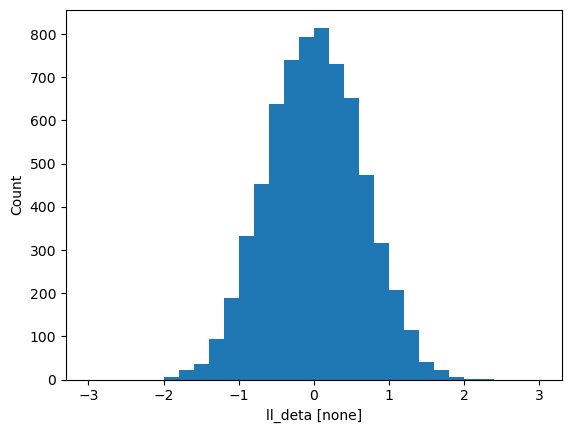

0.036722294855033456


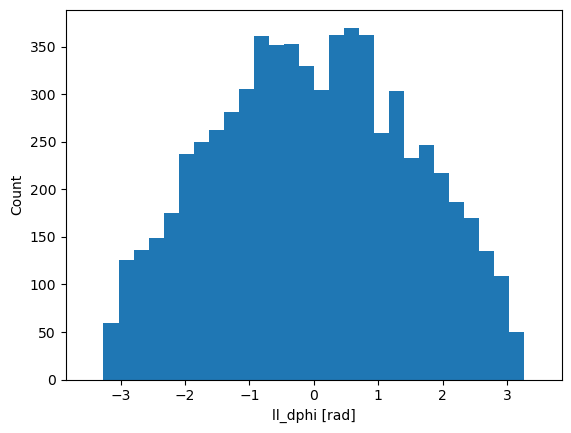

0.036722294855033456


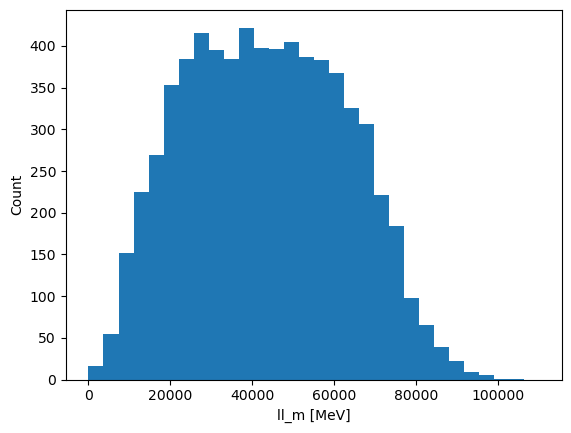

In [27]:
print('ll_deta', np.sum(ll_deta!=-99.0))
print('ll_dphi', np.sum(ll_dphi!=-99.0))
print('ll_m', np.sum(ll_m!=-1.0))



print(np.sum(ll_deta!=-99.0)/len(ll_deta))
bins_edges = np.linspace(-3, 3, 31)
plt.hist(ll_deta, bins=bins_edges)
plt.xlabel("ll_deta [none]")
plt.ylabel("Count")
plt.show()

print(np.sum(ll_dphi!=-99.0)/len(ll_dphi))
bins_edges = np.linspace(-3.5, 3.5, 31)
plt.hist(ll_dphi, bins=bins_edges)
plt.xlabel("ll_dphi [rad]")
plt.ylabel("Count")
plt.show()

print(np.sum(ll_m!=-1.0)/len(ll_m))
bins_edges = np.linspace(0, 110_000, 31)
plt.hist(ll_m, bins=bins_edges)
plt.xlabel("ll_m [MeV]")
plt.ylabel("Count")
plt.show()


903


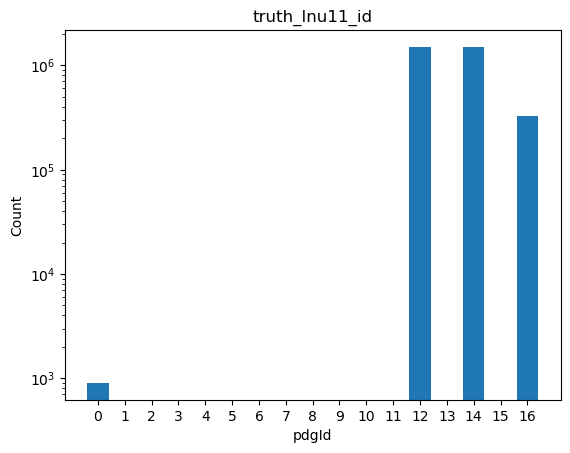

903


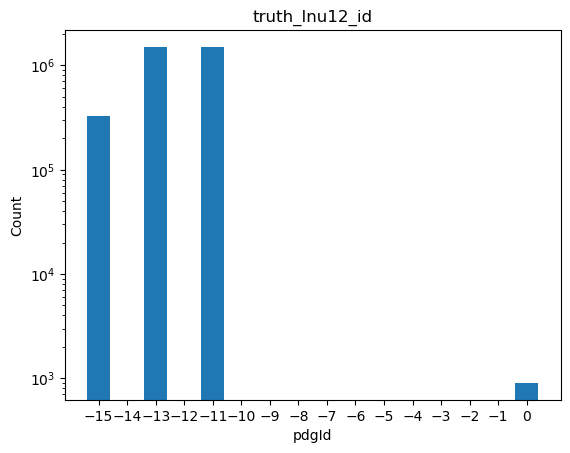

903


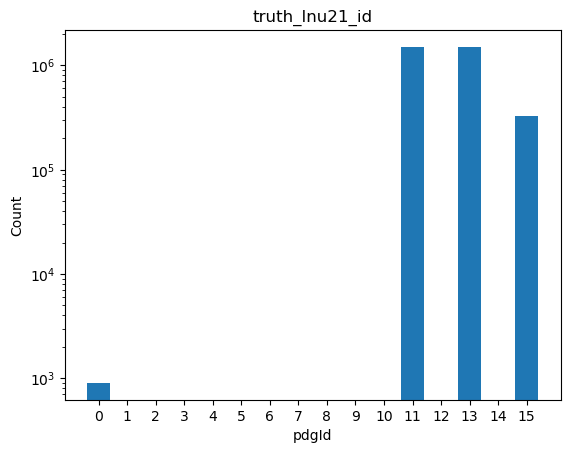

903


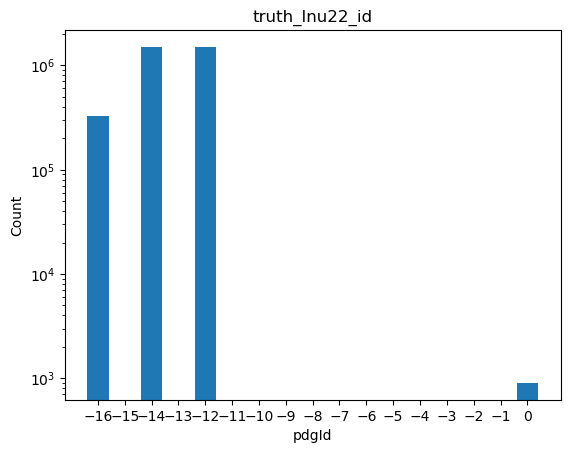

903


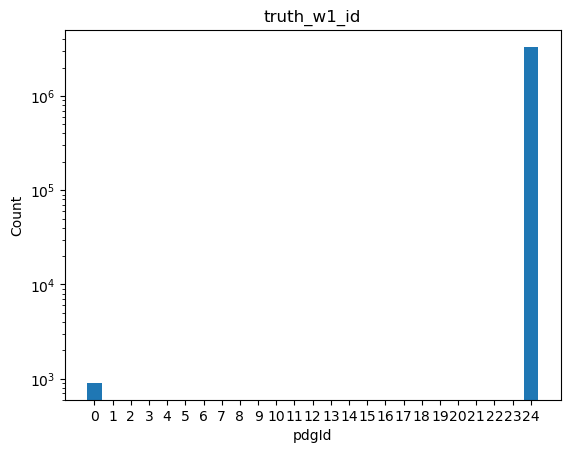

903


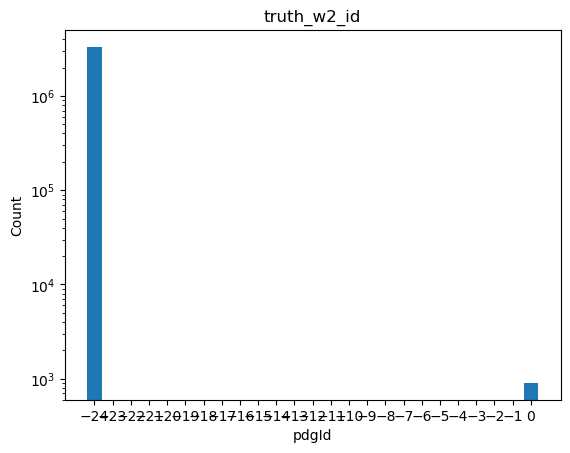

0


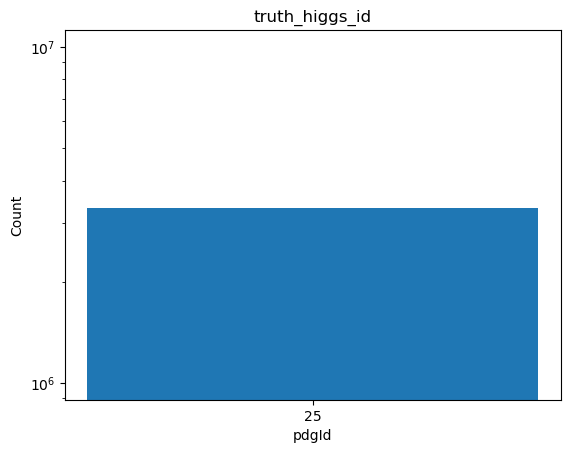

In [28]:
print(np.sum(truth_lnu11_id==0))
unique_ids, counts = np.unique(truth_lnu11_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_lnu11_id")
plt.show()

print(np.sum(truth_lnu12_id==0))
unique_ids, counts = np.unique(truth_lnu12_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_lnu12_id")
plt.show()

print(np.sum(truth_lnu21_id==0))
unique_ids, counts = np.unique(truth_lnu21_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_lnu21_id")
plt.show()

print(np.sum(truth_lnu22_id==0))
unique_ids, counts = np.unique(truth_lnu22_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_lnu22_id")
plt.show()

print(np.sum(truth_w1_id==0))
unique_ids, counts = np.unique(truth_w1_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_w1_id")
plt.show()

print(np.sum(truth_w2_id==0))
unique_ids, counts = np.unique(truth_w2_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_w2_id")
plt.show()

print(np.sum(truth_higgs_id==0))
unique_ids, counts = np.unique(truth_higgs_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_higgs_id")
plt.show()

In [29]:
def is_valid(part1, part2, part11, part12, part21, part22):
    '''
    :params part1 : pdgId of the Hdecay1 --> W+
    :params part2 : pdgId of the Hdecay2 --> W-
    :params part11: pdgId of the particle 1 from Hdecay1 --> neutrino
    :params part12: pdgId of the particle 2 from Hdecay1 --> lepton
    :params part21: pdgId of the particle 1 from Hdecay2 --> lepton
    :params part22: pdgId of the particle 2 from Hdecay2 --> neutrino
    
    :return: boolean array of valid H->WW*->lvlv events
    '''
    cond1 = (part11 * part12 == -11*12) | (part11 * part12 == -13*14)  # pairing correct l and nu for part1
    cond2 = (part21 * part22 == -11*12) | (part21 * part22 == -13*14)  # pairing correct l and nu for part2
    cond3 = part12 * part21 == -11*13  # pairing diff flav leps and conserving charge (e, mu only)
    cond4 = part1 == 24   # confirm W+ boson (excluding zero paddings)
    cond5 = part2 == -24  # confirm W- boson (excluding zero paddings)
    # higgs has already been checked to be the correct particle ID form previous plots
    return cond1 & cond2 & cond3 & cond4 & cond5 

valid_ind = is_valid(truth_w1_id, truth_w2_id, truth_lnu11_id, truth_lnu12_id, truth_lnu21_id, truth_lnu22_id)
valid_car_ind = is_valid(truth_w1_id, truth_w2_id, truth_lnu11_car_id, truth_lnu12_car_id, truth_lnu21_car_id, truth_lnu22_car_id)
print("Check CAR results:", np.all(valid_ind == valid_car_ind))

Check CAR results: True


In [30]:
matched_ind = np.intersect1d(truth_eventNumber[valid_ind], reco_eventNumber)
truth_matched_ind = np.isin(truth_eventNumber[valid_ind], matched_ind)
print("Match truth:", np.sum(truth_matched_ind))
reco_matched_ind = np.isin(reco_eventNumber, matched_ind)
print("Match reco:", np.sum(reco_matched_ind))
print("Matched ratio:", np.sum(reco_matched_ind) / np.sum(truth_matched_ind))
print('Matched reco ratio:', len(matched_ind) / np.sum(reco_matched_ind))
print('Matched truth ratio:', len(matched_ind) / np.sum(truth_matched_ind))
print('Matched events (precheck):', len(matched_ind))


print(np.unique(np.unique(truth_eventNumber[valid_ind][truth_matched_ind], return_counts=True)[1]))
truth_evtnum_2num = np.where(np.unique(truth_eventNumber[valid_ind][truth_matched_ind], return_counts=True)[1] == 2)
print(np.unique(np.unique(reco_eventNumber[reco_matched_ind], return_counts=True)[1]))
reco_evtnum_2num = np.where(np.unique(reco_eventNumber[reco_matched_ind], return_counts=True)[1] == 2)
print(len(reco_eventNumber))

Match truth: 170668
Match reco: 170668
Matched ratio: 1.0
Matched reco ratio: 1.0
Matched truth ratio: 1.0
Matched events (precheck): 170668
[1]
[1]
182042


In [31]:
np.unique(np.unique(reco_eventNumber[reco_matched_ind], return_counts=True)[1])

array([1])

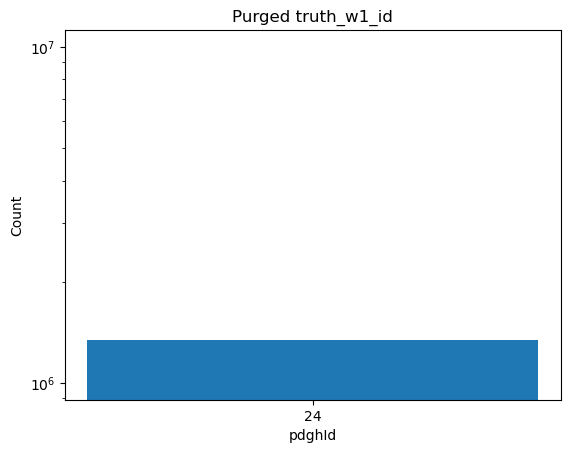

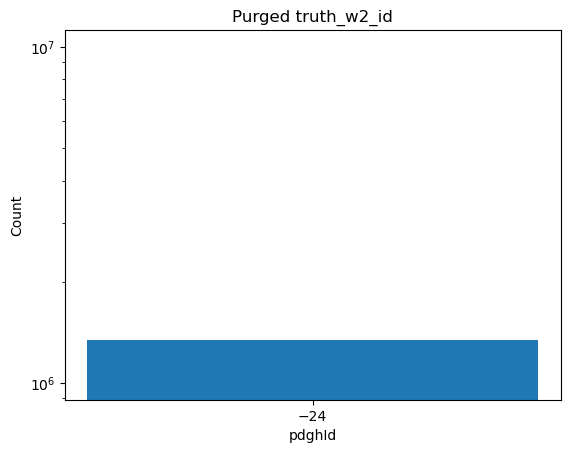

Two w boson need to have same length... True


In [32]:
unique_ids, counts = np.unique(truth_w1_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdghId")
plt.ylabel("Count")
plt.title("Purged truth_w1_id")
plt.show()

unique_ids, counts = np.unique(truth_w2_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdghId")
plt.ylabel("Count")
plt.title("Purged truth_w2_id")
plt.show()

print(
    "Two w boson need to have same length...",
    np.all(len(truth_w1_id[valid_ind] == len(truth_w2_id[valid_ind]))),
)

In [33]:
def test_plot(data, title, xlabel="[MeV]", ylabel="Count"):
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=np.linspace(data.min(), data.max(), 101))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    plt.close()

In [34]:
@njit(fastmath=True)
def px(pt, phi):
    return pt * np.cos(phi)


@njit(fastmath=True)
def py(pt, phi):
    return pt * np.sin(phi)


@njit(fastmath=True)
def pz(pt, eta):
    return pt * np.sinh(eta)


@njit(fastmath=True)
def energy(pt, eta, m):
    return np.sqrt(np.square(pt) + np.square(pz(pt, eta)) + np.square(m))

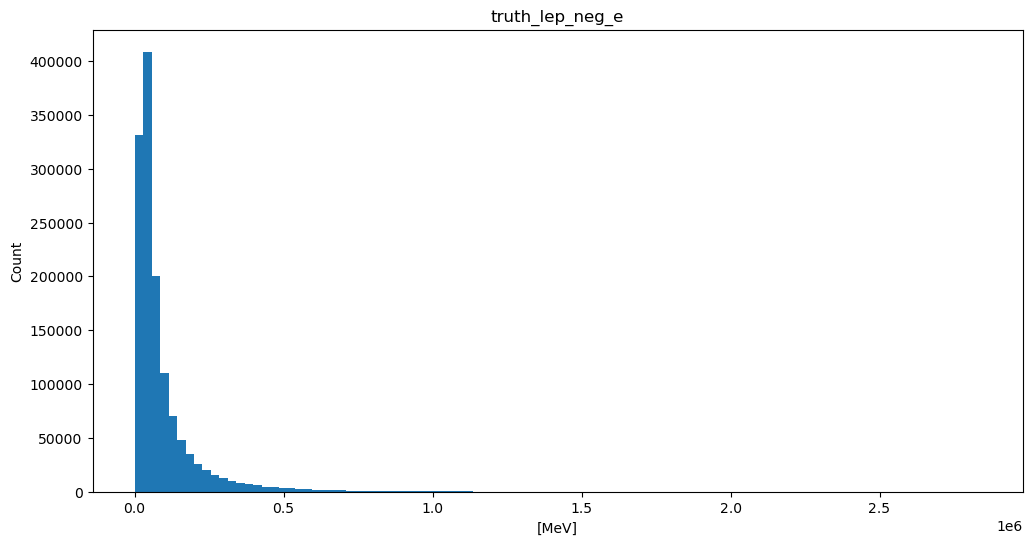

In [35]:
# truth lep

truth_nu_pos_pt = truth_lnu11_pt[valid_ind]
truth_lep_neg_pt = truth_lnu12_pt[valid_ind]
truth_lep_pos_pt = truth_lnu21_pt[valid_ind]
truth_nu_neg_pt = truth_lnu22_pt[valid_ind]
# test_plot(truth_nu_pos_pt, 'truth_nu_pos_pt')
# test_plot(truth_lep_neg_pt, 'truth_lep_neg_pt')

truth_nu_pos_eta = truth_lnu11_eta[valid_ind]
truth_lep_neg_eta = truth_lnu12_eta[valid_ind]
truth_lep_pos_eta = truth_lnu21_eta[valid_ind]
truth_nu_neg_eta = truth_lnu22_eta[valid_ind]

truth_nu_pos_phi = truth_lnu11_phi[valid_ind]
truth_lep_neg_phi = truth_lnu12_phi[valid_ind]
truth_lep_pos_phi = truth_lnu21_phi[valid_ind]
truth_nu_neg_phi = truth_lnu22_phi[valid_ind]

truth_nu_pos_m = np.zeros(truth_nu_pos_phi.shape)
lep_neg_m = np.full(len(truth_nu_pos_m), -999, dtype=np.float32)
mask_electron = truth_lnu12_id[valid_ind] == -11
mask_muon = truth_lnu12_id[valid_ind] == -13
lep_neg_m[mask_electron] = 0.000511
lep_neg_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_neg_id is not lepton")
lep_pos_m = np.full(len(truth_nu_pos_phi), -999, dtype=np.float32)
mask_electron = truth_lnu21_id[valid_ind] == 11
mask_muon = truth_lnu21_id[valid_ind] == 13
lep_pos_m[mask_electron] = 0.000511
lep_pos_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_pos_id is not lepton")
truth_nu_neg_m = np.zeros(truth_nu_neg_phi.shape)

truth_nu_pos_px = px(truth_nu_pos_pt, truth_nu_pos_phi)
truth_nu_pos_py = py(truth_nu_pos_pt, truth_nu_pos_phi)
truth_nu_pos_pz = pz(truth_nu_pos_pt, truth_nu_pos_eta)
truth_nu_pos_e = energy(truth_nu_pos_pt, truth_nu_pos_eta, truth_nu_pos_m)
truth_nu_neg_px = px(truth_nu_neg_pt, truth_nu_neg_phi)
truth_nu_neg_py = py(truth_nu_neg_pt, truth_nu_neg_phi)
truth_nu_neg_pz = pz(truth_nu_neg_pt, truth_nu_neg_eta)
truth_nu_neg_e = energy(truth_nu_neg_pt, truth_nu_neg_eta, truth_nu_neg_m)
truth_lep_pos_px = px(truth_lep_pos_pt, truth_lep_pos_phi)
truth_lep_pos_py = py(truth_lep_pos_pt, truth_lep_pos_phi)
truth_lep_pos_pz = pz(truth_lep_pos_pt, truth_lep_pos_eta)
truth_lep_pos_e = energy(truth_lep_pos_pt, truth_lep_pos_eta, lep_pos_m)
truth_lep_neg_px = px(truth_lep_neg_pt, truth_lep_neg_phi)
truth_lep_neg_py = py(truth_lep_neg_pt, truth_lep_neg_phi)
truth_lep_neg_pz = pz(truth_lep_neg_pt, truth_lep_neg_eta)
truth_lep_neg_e = energy(truth_lep_neg_pt, truth_lep_neg_eta, lep_neg_m)
test_plot(truth_lep_neg_e, "truth_lep_neg_e")

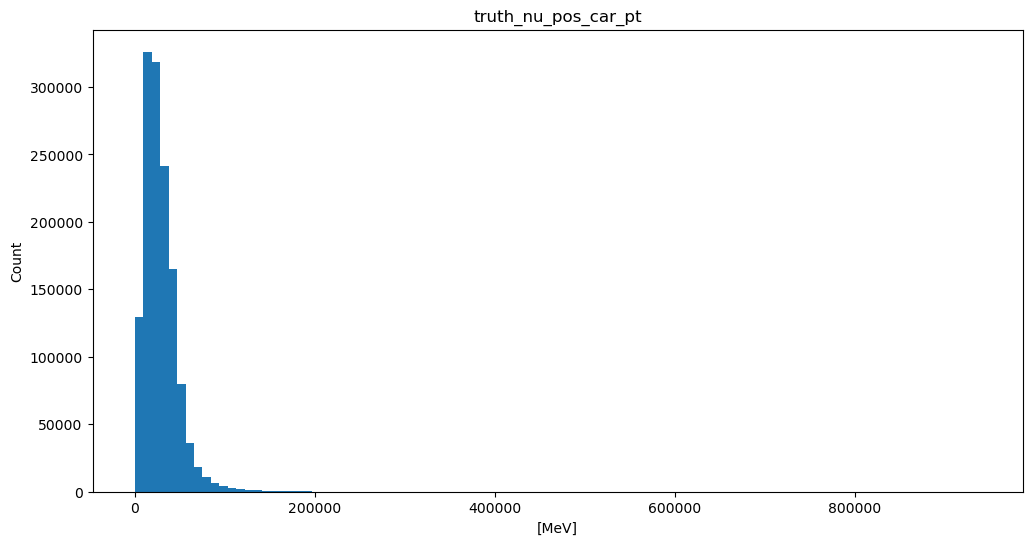

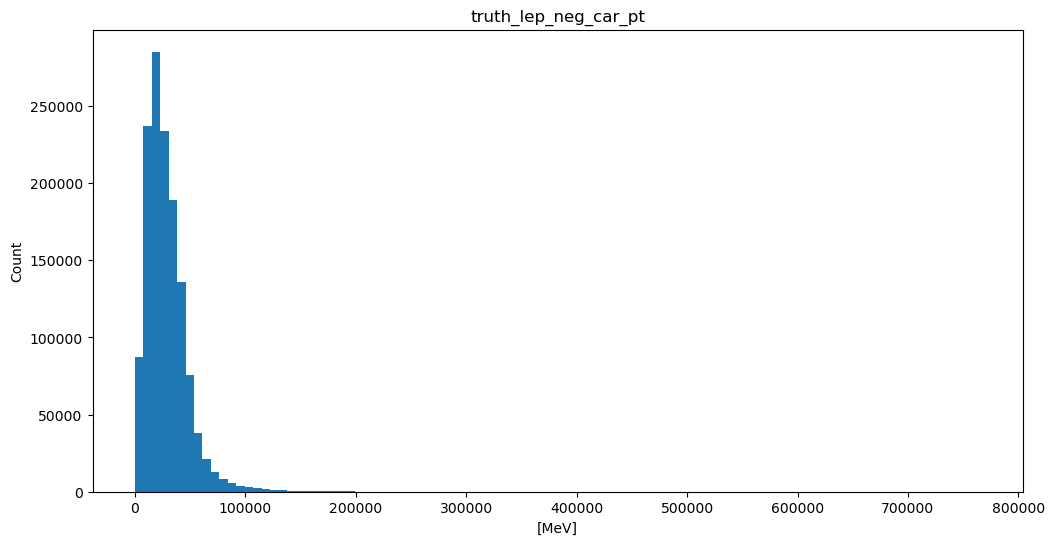

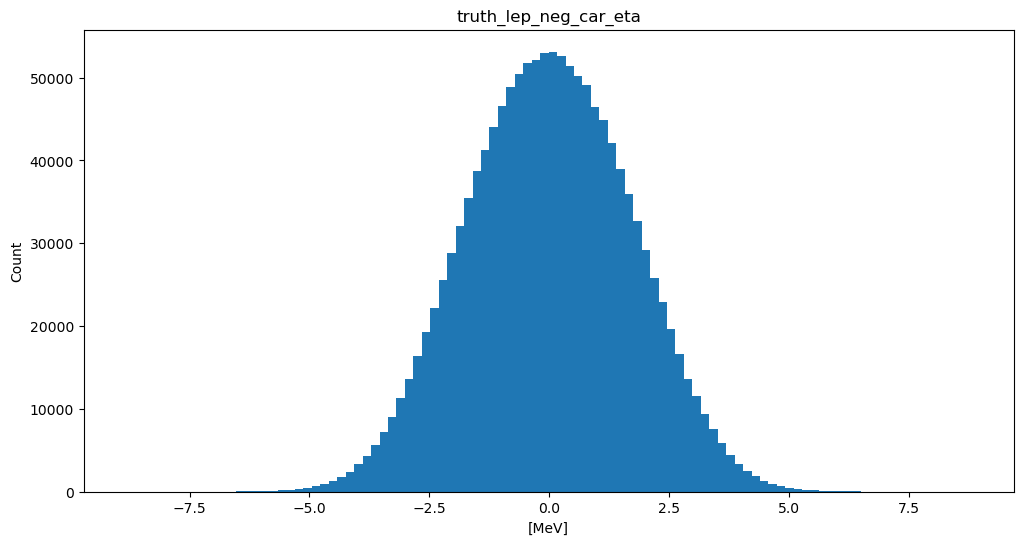

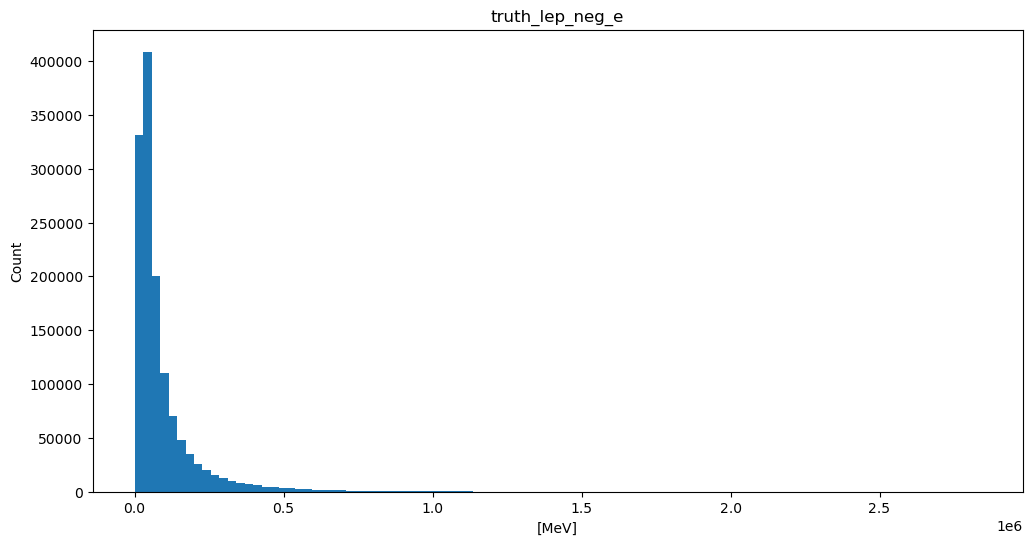

In [36]:
# truth lep (CAR)

truth_nu_pos_car_pt = truth_lnu11_car_pt[valid_ind]
truth_lep_neg_car_pt = truth_lnu12_car_pt[valid_ind]
truth_lep_pos_car_pt = truth_lnu21_car_pt[valid_ind]
truth_nu_neg_car_pt = truth_lnu22_car_pt[valid_ind]
test_plot(truth_nu_pos_car_pt, "truth_nu_pos_car_pt")
test_plot(truth_lep_neg_car_pt, "truth_lep_neg_car_pt")

truth_nu_pos_car_eta = truth_lnu11_car_eta[valid_ind]
truth_lep_neg_car_eta = truth_lnu12_car_eta[valid_ind]
truth_lep_pos_car_eta = truth_lnu21_car_eta[valid_ind]
truth_nu_neg_car_eta = truth_lnu22_car_eta[valid_ind]
test_plot(truth_lep_neg_car_eta, "truth_lep_neg_car_eta")


truth_nu_pos_car_phi = truth_lnu11_car_phi[valid_ind]
truth_lep_neg_car_phi = truth_lnu12_car_phi[valid_ind]
truth_lep_pos_car_phi = truth_lnu21_car_phi[valid_ind]
truth_nu_neg_car_phi = truth_lnu22_car_phi[valid_ind]

truth_nu_pos_car_m = np.zeros(truth_nu_pos_car_phi.shape)
lep_neg_car_m = np.full(len(truth_nu_pos_car_phi), -999, dtype=np.float32)
mask_electron = truth_lnu12_id[valid_ind] == -11
mask_muon = truth_lnu12_id[valid_ind] == -13
lep_neg_car_m[mask_electron] = 0.000511
lep_neg_car_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_neg_id is not lepton")
lep_pos_car_m = np.full(len(truth_nu_pos_car_phi), -999, dtype=np.float32)
mask_electron = truth_lnu21_id[valid_ind] == 11
mask_muon = truth_lnu21_id[valid_ind] == 13
lep_pos_car_m[mask_electron] = 0.000511
lep_pos_car_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_pos_id is not lepton")
truth_nu_neg_car_m = np.zeros(truth_nu_neg_car_phi.shape)

truth_nu_pos_car_px = px(truth_nu_pos_car_pt, truth_nu_pos_car_phi)
truth_nu_pos_car_py = py(truth_nu_pos_car_pt, truth_nu_pos_car_phi)
truth_nu_pos_car_pz = pz(truth_nu_pos_car_pt, truth_nu_pos_car_eta)
truth_nu_pos_car_e = energy(
    truth_nu_pos_car_pt, truth_nu_pos_car_eta, truth_nu_pos_car_m
)
truth_nu_neg_car_px = px(truth_nu_neg_car_pt, truth_nu_neg_car_phi)
truth_nu_neg_car_py = py(truth_nu_neg_car_pt, truth_nu_neg_car_phi)
truth_nu_neg_car_pz = pz(truth_nu_neg_car_pt, truth_nu_neg_car_eta)
truth_nu_neg_car_e = energy(
    truth_nu_neg_car_pt, truth_nu_neg_car_eta, truth_nu_neg_car_m
)
truth_lep_pos_car_px = px(truth_lep_pos_car_pt, truth_lep_pos_car_phi)
truth_lep_pos_car_py = py(truth_lep_pos_car_pt, truth_lep_pos_car_phi)
truth_lep_pos_car_pz = pz(truth_lep_pos_car_pt, truth_lep_pos_car_eta)
truth_lep_pos_car_e = energy(truth_lep_pos_car_pt, truth_lep_pos_car_eta, lep_pos_car_m)
truth_lep_neg_car_px = px(truth_lep_neg_car_pt, truth_lep_neg_car_phi)
truth_lep_neg_car_py = py(truth_lep_neg_car_pt, truth_lep_neg_car_phi)
truth_lep_neg_car_pz = pz(truth_lep_neg_car_pt, truth_lep_neg_car_eta)
truth_lep_neg_car_e = energy(truth_lep_neg_car_pt, truth_lep_neg_car_eta, lep_neg_car_m)
test_plot(truth_lep_neg_e, "truth_lep_neg_e")

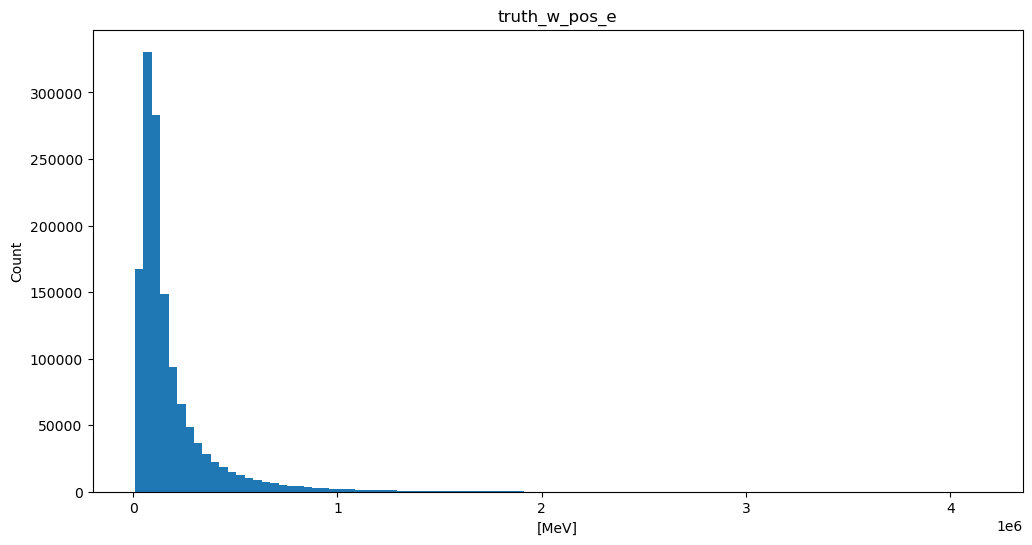

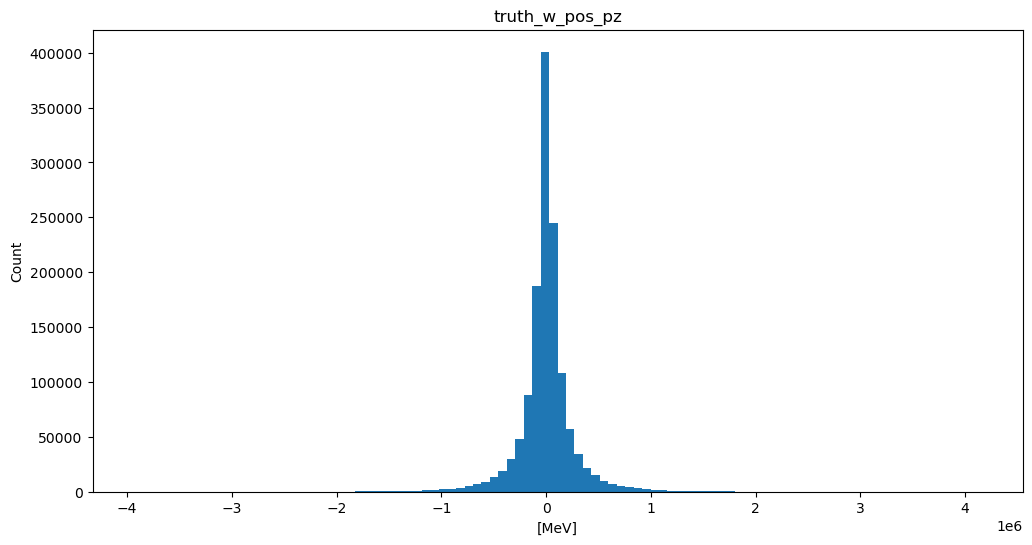

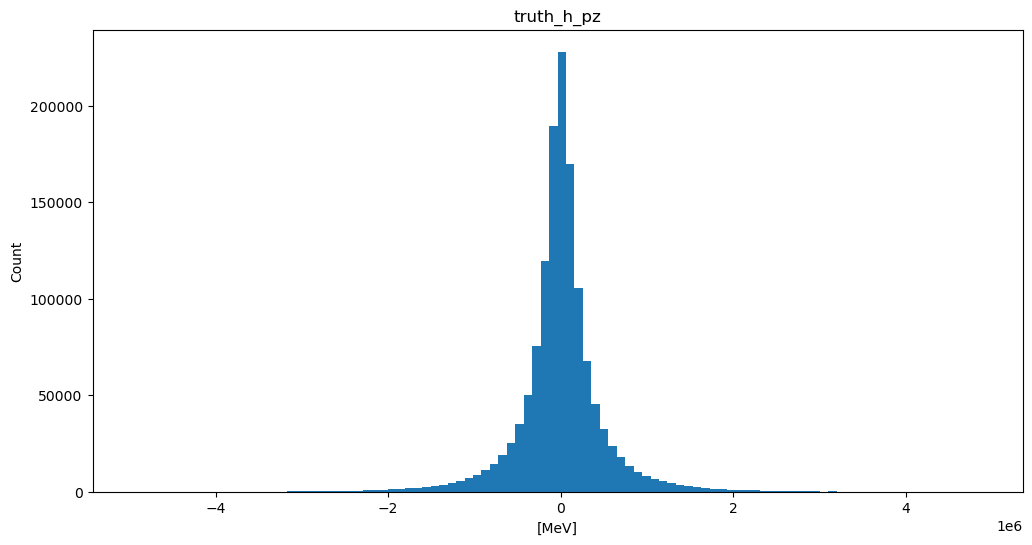

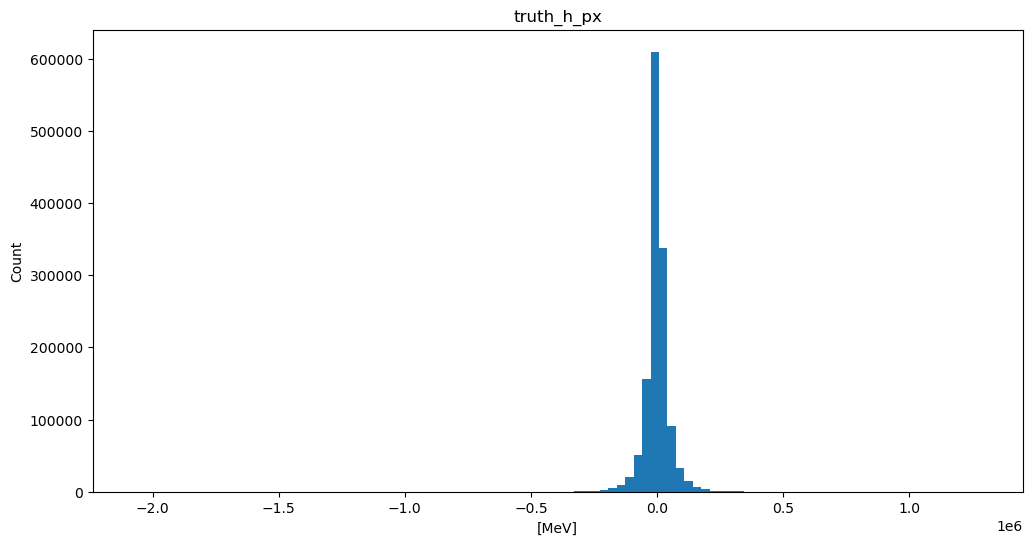

In [37]:
# truth w

truth_w_neg = truth_w1_id[valid_ind]
truth_w_neg_pt = truth_w1_pt[valid_ind]
truth_w_neg_eta = truth_w1_eta[valid_ind]
truth_w_neg_phi = truth_w1_phi[valid_ind]
truth_w_neg_m = truth_w1_m[valid_ind]
# test_plot(truth_w_neg_m, 'truth_w_neg_m')

truth_w_pos = truth_w2_id[valid_ind]
truth_w_pos_pt = truth_w2_pt[valid_ind]
truth_w_pos_eta = truth_w2_eta[valid_ind]
truth_w_pos_phi = truth_w2_phi[valid_ind]
truth_w_pos_m = truth_w2_m[valid_ind]
# test_plot(truth_w_pos_m, 'truth_w_pos_m')

truth_w_neg_px = px(truth_w_neg_pt, truth_w_neg_phi)
truth_w_neg_py = py(truth_w_neg_pt, truth_w_neg_phi)
truth_w_neg_pz = pz(truth_w_neg_pt, truth_w_neg_eta)
truth_w_neg_e = energy(truth_w_neg_pt, truth_w_neg_eta, truth_w_neg_m)
truth_w_pos_px = px(truth_w_pos_pt, truth_w_pos_phi)
truth_w_pos_py = py(truth_w_pos_pt, truth_w_pos_phi)
truth_w_pos_pz = pz(truth_w_pos_pt, truth_w_pos_eta)
truth_w_pos_e = energy(truth_w_pos_pt, truth_w_pos_eta, truth_w_pos_m)
test_plot(truth_w_pos_e, "truth_w_pos_e")
test_plot(truth_w_pos_pz, "truth_w_pos_pz")

# truth h
truth_h_pt = truth_higgs_pt[valid_ind]
truth_h_eta = truth_higgs_eta[valid_ind]
truth_h_phi = truth_higgs_phi[valid_ind]
truth_h_m = truth_higgs_m[valid_ind]
# test_plot(truth_h_m, 'truth_h_m')

truth_h_px = px(truth_h_pt, truth_h_phi)
truth_h_py = py(truth_h_pt, truth_h_phi)
truth_h_pz = pz(truth_h_pt, truth_h_eta)
truth_h_e = energy(truth_h_pt, truth_h_eta, truth_h_m)
test_plot(truth_h_pz, "truth_h_pz")
test_plot(truth_h_px, "truth_h_px")

In [38]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([0, 0, 0, 0, 0])
np.where(arr1 < 3, arr1, arr2)

array([1, 2, 0, 0, 0])

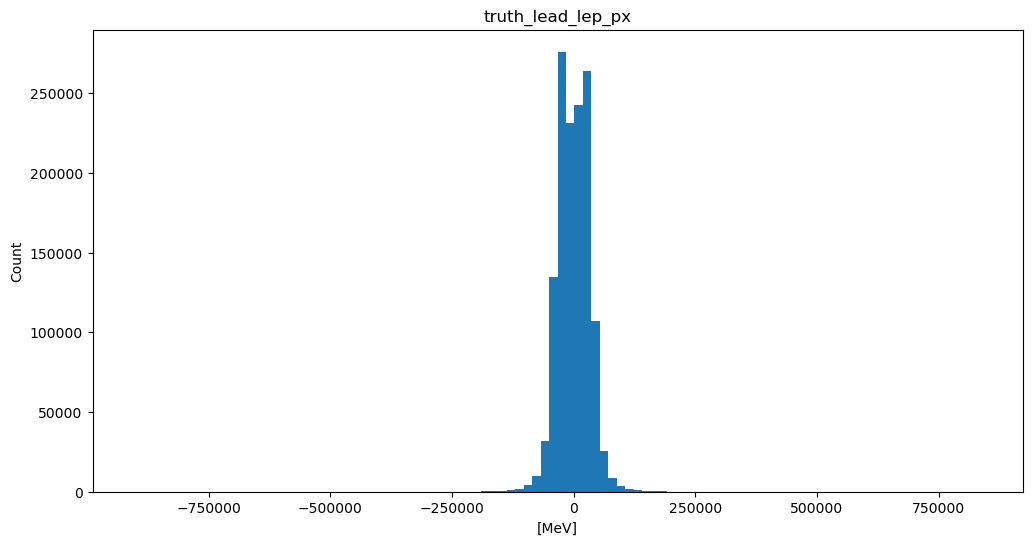

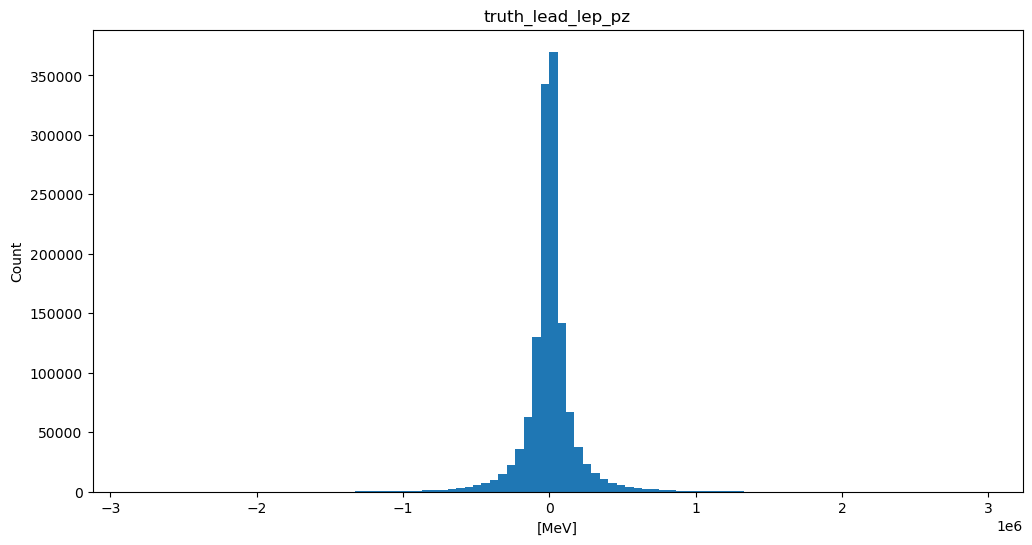

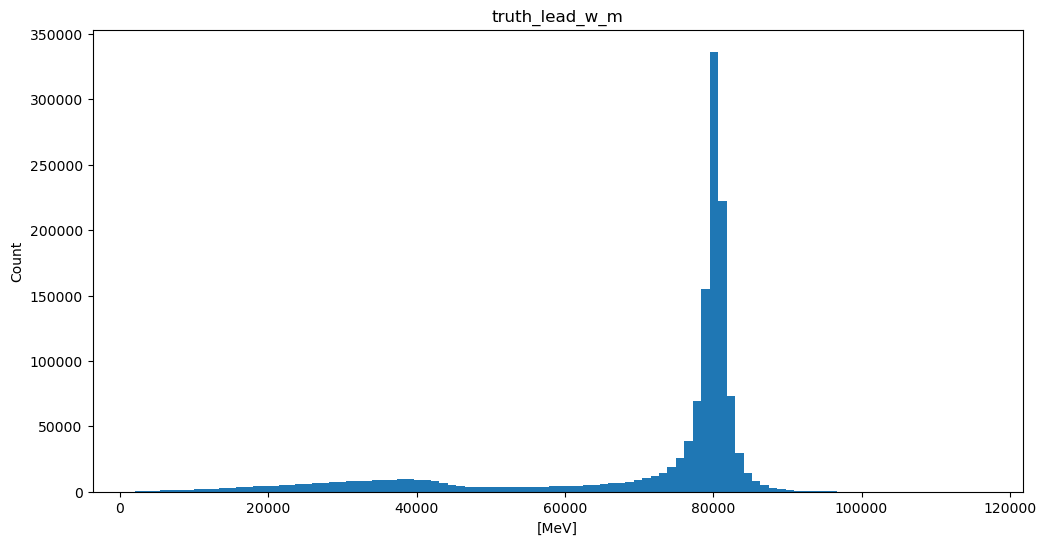

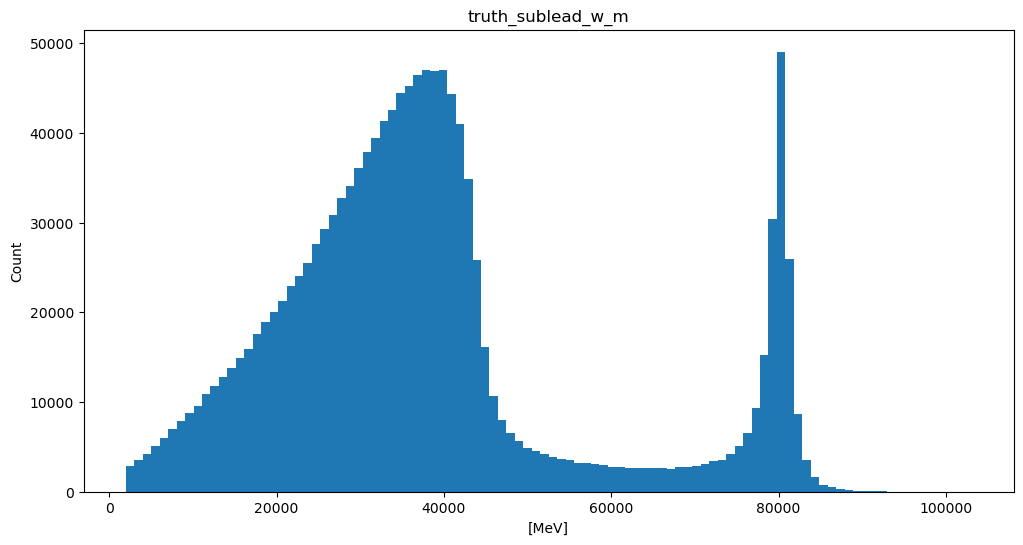

In [39]:
# (sub)lead identification (truth)

neg_leading_mask = truth_lep_neg_pt >= truth_lep_pos_pt

truth_lead_lep_px = np.where(neg_leading_mask, truth_lep_neg_px, truth_lep_pos_px)
truth_lead_lep_py = np.where(neg_leading_mask, truth_lep_neg_py, truth_lep_pos_py)
truth_lead_lep_pz = np.where(neg_leading_mask, truth_lep_neg_pz, truth_lep_pos_pz)
truth_lead_lep_e = np.where(neg_leading_mask, truth_lep_neg_e, truth_lep_pos_e)
test_plot(truth_lead_lep_px, "truth_lead_lep_px")
test_plot(truth_lead_lep_pz, "truth_lead_lep_pz")

truth_sublead_lep_px = np.where(neg_leading_mask, truth_lep_pos_px, truth_lep_neg_px)
truth_sublead_lep_py = np.where(neg_leading_mask, truth_lep_pos_py, truth_lep_neg_py)
truth_sublead_lep_pz = np.where(neg_leading_mask, truth_lep_pos_pz, truth_lep_neg_pz)
truth_sublead_lep_e = np.where(neg_leading_mask, truth_lep_pos_e, truth_lep_neg_e)

truth_lead_nu_px = np.where(neg_leading_mask, truth_nu_neg_px, truth_nu_pos_px)
truth_lead_nu_py = np.where(neg_leading_mask, truth_nu_neg_py, truth_nu_pos_py)
truth_lead_nu_pz = np.where(neg_leading_mask, truth_nu_neg_pz, truth_nu_pos_pz)
truth_lead_nu_e = np.where(neg_leading_mask, truth_nu_neg_e, truth_nu_pos_e)

truth_sublead_nu_px = np.where(neg_leading_mask, truth_nu_pos_px, truth_nu_neg_px)
truth_sublead_nu_py = np.where(neg_leading_mask, truth_nu_pos_py, truth_nu_neg_py)
truth_sublead_nu_pz = np.where(neg_leading_mask, truth_nu_pos_pz, truth_nu_neg_pz)
truth_sublead_nu_e = np.where(neg_leading_mask, truth_nu_pos_e, truth_nu_neg_e)

truth_lead_w_px = np.where(neg_leading_mask, truth_w_neg_px, truth_w_pos_px)
truth_lead_w_py = np.where(neg_leading_mask, truth_w_neg_py, truth_w_pos_py)
truth_lead_w_pz = np.where(neg_leading_mask, truth_w_neg_pz, truth_w_pos_pz)
truth_lead_w_e = np.where(neg_leading_mask, truth_w_neg_e, truth_w_pos_e)
truth_lead_w_m = np.where(neg_leading_mask, truth_w_neg_m, truth_w_pos_m)

truth_sublead_w_px = np.where(neg_leading_mask, truth_w_pos_px, truth_w_neg_px)
truth_sublead_w_py = np.where(neg_leading_mask, truth_w_pos_py, truth_w_neg_py)
truth_sublead_w_pz = np.where(neg_leading_mask, truth_w_pos_pz, truth_w_neg_pz)
truth_sublead_w_e = np.where(neg_leading_mask, truth_w_pos_e, truth_w_neg_e)
truth_sublead_w_m = np.where(neg_leading_mask, truth_w_pos_m, truth_w_neg_m)
test_plot(truth_lead_w_m, "truth_lead_w_m")
test_plot(truth_sublead_w_m, "truth_sublead_w_m")

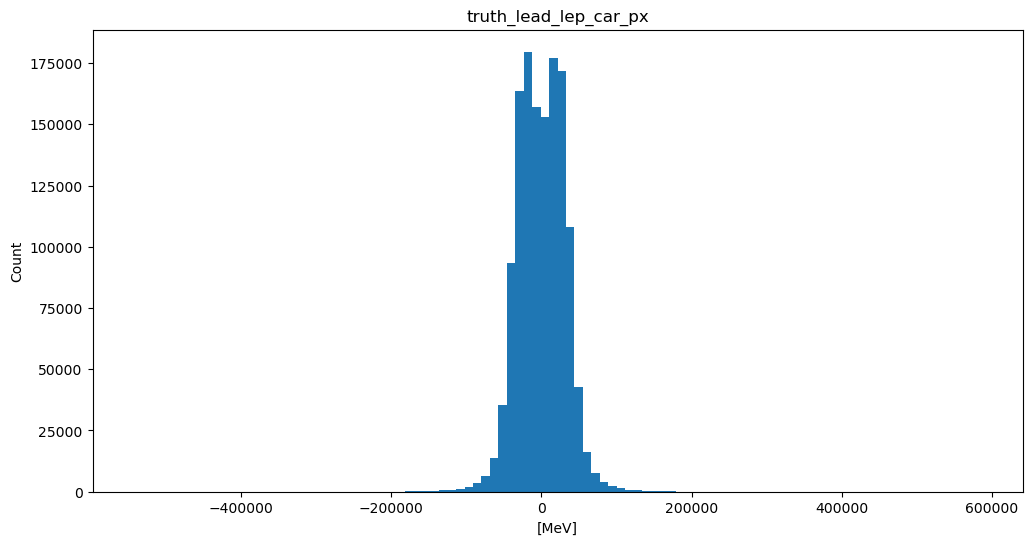

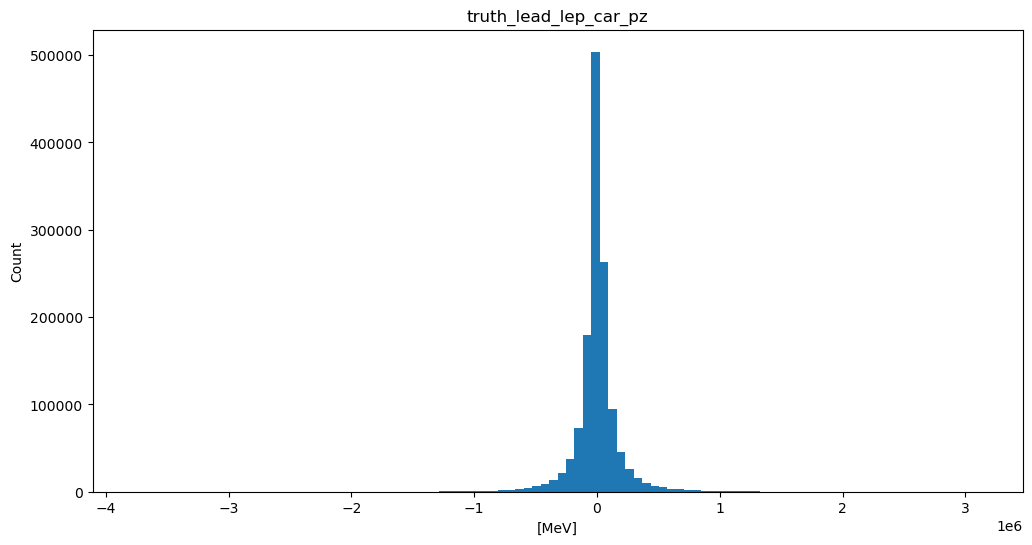

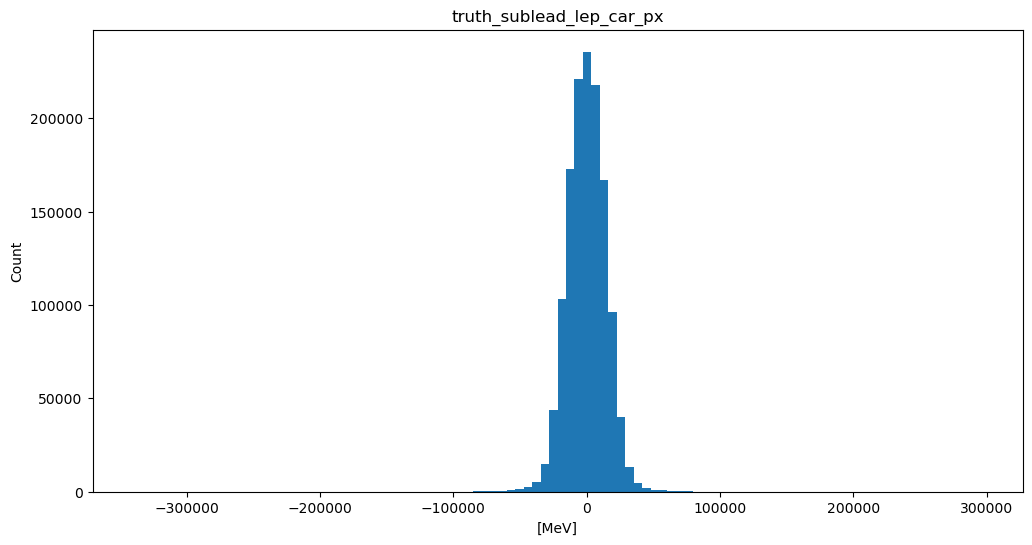

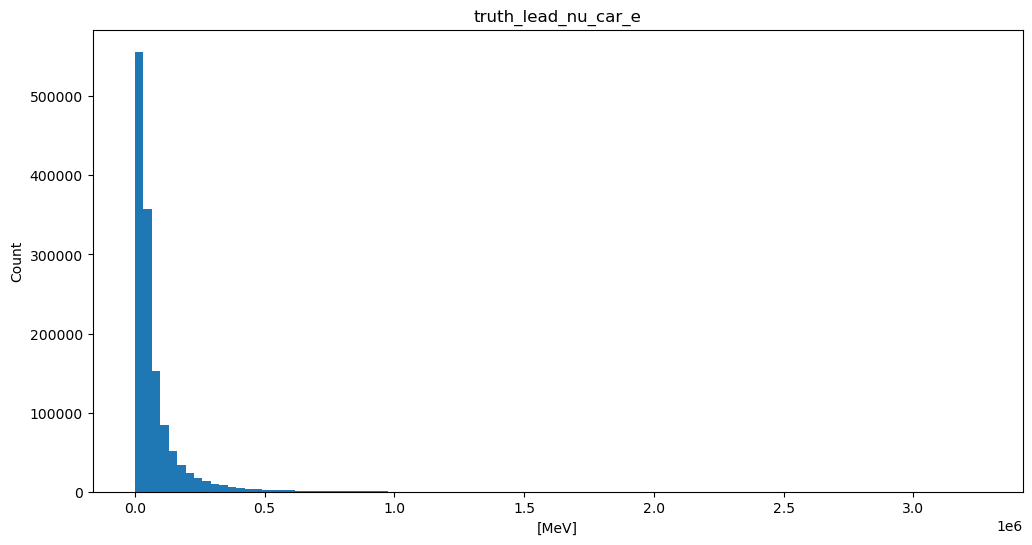

In [40]:
# (sub)lead identification (truth_CAR)

neg_leading_car_mask = truth_lep_neg_car_pt >= truth_lep_pos_car_pt

truth_lead_lep_car_px = np.where(
    neg_leading_car_mask, truth_lep_neg_car_px, truth_lep_pos_car_px
)
truth_lead_lep_car_py = np.where(
    neg_leading_car_mask, truth_lep_neg_car_py, truth_lep_pos_car_py
)
truth_lead_lep_car_pz = np.where(
    neg_leading_car_mask, truth_lep_neg_car_pz, truth_lep_pos_car_pz
)
truth_lead_lep_car_e = np.where(
    neg_leading_car_mask, truth_lep_neg_car_e, truth_lep_pos_car_e
)
test_plot(truth_lead_lep_car_px, "truth_lead_lep_car_px")
test_plot(truth_lead_lep_car_pz, "truth_lead_lep_car_pz")

truth_sublead_lep_car_px = np.where(
    neg_leading_car_mask, truth_lep_pos_car_px, truth_lep_neg_car_px
)
truth_sublead_lep_car_py = np.where(
    neg_leading_car_mask, truth_lep_pos_car_py, truth_lep_neg_car_py
)
truth_sublead_lep_car_pz = np.where(
    neg_leading_car_mask, truth_lep_pos_car_pz, truth_lep_neg_car_pz
)
truth_sublead_lep_car_e = np.where(
    neg_leading_car_mask, truth_lep_pos_car_e, truth_lep_neg_car_e
)
test_plot(truth_sublead_lep_car_px, "truth_sublead_lep_car_px")

truth_lead_nu_car_px = np.where(
    neg_leading_car_mask, truth_nu_neg_car_px, truth_nu_pos_car_px
)
truth_lead_nu_car_py = np.where(
    neg_leading_car_mask, truth_nu_neg_car_py, truth_nu_pos_car_py
)
truth_lead_nu_car_pz = np.where(
    neg_leading_car_mask, truth_nu_neg_car_pz, truth_nu_pos_car_pz
)
truth_lead_nu_car_e = np.where(
    neg_leading_car_mask, truth_nu_neg_car_e, truth_nu_pos_car_e
)

truth_sublead_nu_car_px = np.where(
    neg_leading_car_mask, truth_nu_pos_car_px, truth_nu_neg_car_px
)
truth_sublead_nu_car_py = np.where(
    neg_leading_car_mask, truth_nu_pos_car_py, truth_nu_neg_car_py
)
truth_sublead_nu_car_pz = np.where(
    neg_leading_car_mask, truth_nu_pos_car_pz, truth_nu_neg_car_pz
)
truth_sublead_nu_car_e = np.where(
    neg_leading_car_mask, truth_nu_pos_car_e, truth_nu_neg_car_e
)

test_plot(truth_lead_nu_car_e, "truth_lead_nu_car_e")

In [41]:
GEV = 1e-3

def pt(px, py):
    return np.sqrt(np.square(px) + np.square(py))


def eta(px, py, pz):
    pt = np.sqrt(np.square(px) + np.square(py))
    return np.arcsinh(np.divide(pz, pt))


def phi(px, py):
    return np.arctan2(py, px)


def m(p4):
    return np.sqrt(
        np.square(p4[:, 3])
        - np.square(p4[:, 0])
        - np.square(p4[:, 1])
        - np.square(p4[:, 2])
    )


@dataclass
class Truth_lead_lep:
    px = truth_lead_lep_px * GEV
    py = truth_lead_lep_py * GEV
    pz = truth_lead_lep_pz * GEV
    energy = truth_lead_lep_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_sublead_lep:
    px = truth_sublead_lep_px * GEV
    py = truth_sublead_lep_py * GEV
    pz = truth_sublead_lep_pz * GEV
    energy = truth_sublead_lep_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_dilep:
    p4 = Truth_lead_lep.p4 + Truth_sublead_lep.p4
    p3 = p4[:, :3]
    px = p4[:, 0]
    py = p4[:, 1]
    pz = p4[:, 2]
    dphi = np.abs(
        phi(Truth_lead_lep.px, Truth_lead_lep.py)
        - phi(Truth_sublead_lep.px, Truth_sublead_lep.py)
    )
    deta = np.abs(
        eta(Truth_lead_lep.px, Truth_lead_lep.py, Truth_lead_lep.pz)
        - eta(Truth_sublead_lep.px, Truth_sublead_lep.py, Truth_sublead_lep.pz)
    )
    m = m(p4)


@dataclass
class Truth_lead_nu:
    px = truth_lead_nu_px * GEV
    py = truth_lead_nu_py * GEV
    pz = truth_lead_nu_pz * GEV
    energy = truth_lead_nu_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_sublead_nu:
    px = truth_sublead_nu_px * GEV
    py = truth_sublead_nu_py * GEV
    pz = truth_sublead_nu_pz * GEV
    energy = truth_sublead_nu_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_lead_lep_CAR:
    px = truth_lep_pos_car_px * GEV
    py = truth_lep_pos_car_py * GEV
    pz = truth_lep_pos_car_pz * GEV
    energy = truth_lep_pos_car_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_sublead_lep_CAR:
    px = truth_sublead_lep_car_px * GEV
    py = truth_sublead_lep_car_py * GEV
    pz = truth_sublead_lep_car_pz * GEV
    energy = truth_sublead_lep_car_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_dilep_CAR:
    p4 = Truth_lead_lep_CAR.p4 + Truth_sublead_lep_CAR.p4
    p3 = p4[:, :3]
    px = p4[:, 0]
    py = p4[:, 1]
    pz = p4[:, 2]
    deta = np.abs(
        eta(Truth_lead_lep_CAR.px, Truth_lead_lep_CAR.py, Truth_lead_lep_CAR.pz)
        - eta(
            Truth_sublead_lep_CAR.px, Truth_sublead_lep_CAR.py, Truth_sublead_lep_CAR.pz
        )
    )
    dphi = np.abs(
        phi(Truth_lead_lep_CAR.px, Truth_lead_lep_CAR.py)
        - phi(Truth_sublead_lep_CAR.px, Truth_sublead_lep_CAR.py)
    )
    m = m(p4)


@dataclass
class Truth_lead_nu_CAR:
    px = truth_lead_nu_car_px * GEV
    py = truth_lead_nu_car_py * GEV
    pz = truth_lead_nu_car_pz * GEV
    energy = truth_lead_nu_car_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_sublead_nu_CAR:
    px = truth_sublead_nu_car_px * GEV
    py = truth_sublead_nu_car_py * GEV
    pz = truth_sublead_nu_car_pz * GEV
    energy = truth_sublead_nu_car_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Lead_w:
    px = truth_lead_w_px * GEV
    py = truth_lead_w_py * GEV
    pz = truth_lead_w_pz * GEV
    energy = truth_lead_w_e * GEV
    m = truth_lead_w_m * GEV
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Sublead_w:
    px = truth_sublead_w_px * GEV
    py = truth_sublead_w_py * GEV
    pz = truth_sublead_w_pz * GEV
    energy = truth_sublead_w_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    m = truth_sublead_w_m * GEV
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


if __name__ == "__main__":
    print(Truth_lead_lep)
    print(Truth_sublead_lep)
    print(Truth_dilep)
    print(Truth_lead_nu)
    print(Truth_sublead_nu)
    print(Lead_w)
    print(Sublead_w)

/tmp/ipykernel_8615/1604614495.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(


<class '__main__.Truth_lead_lep'>
<class '__main__.Truth_sublead_lep'>
<class '__main__.Truth_dilep'>
<class '__main__.Truth_lead_nu'>
<class '__main__.Truth_sublead_nu'>
<class '__main__.Lead_w'>
<class '__main__.Sublead_w'>


<class 'numpy.ndarray'>


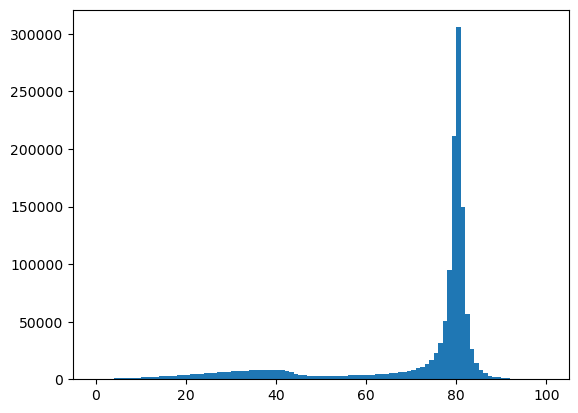

<class 'numpy.ndarray'>


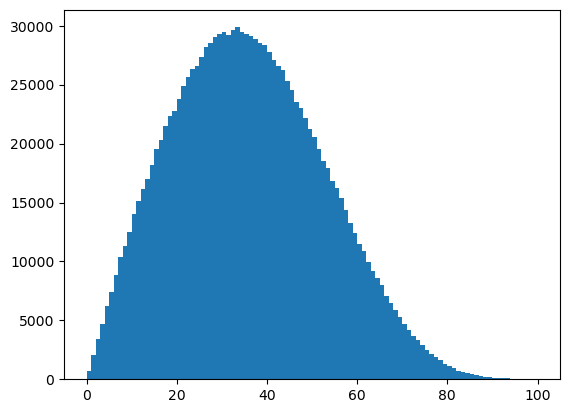

<class 'numpy.ndarray'>


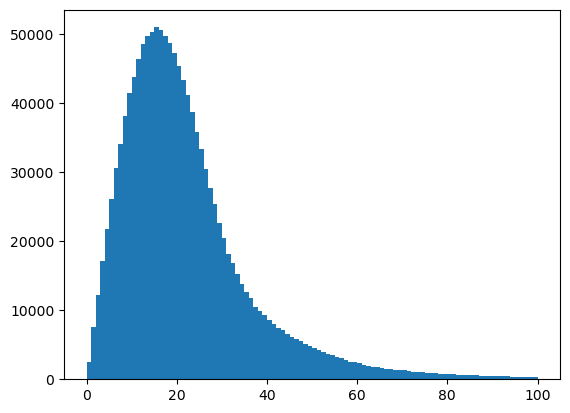

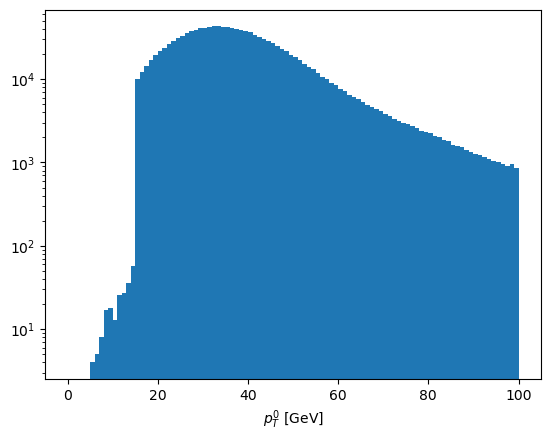

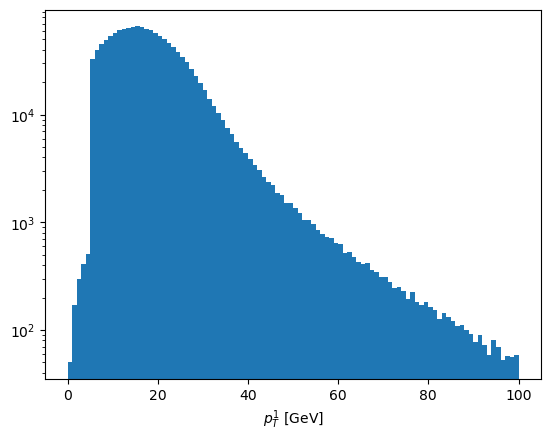

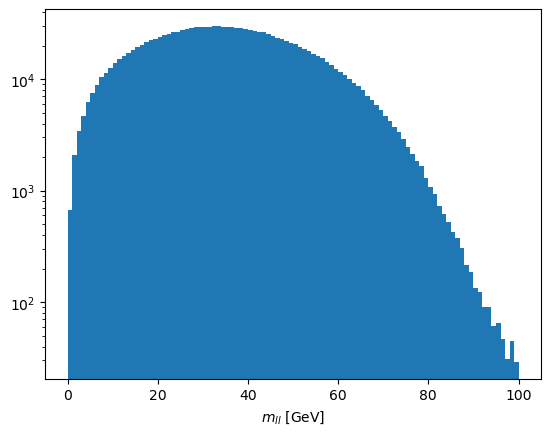

In [42]:
# Double check the wrapped dataclass

test_truth_lead_w = Lead_w()
print(type(test_truth_lead_w.energy))
plt.hist(test_truth_lead_w.m, bins=np.linspace(0, 100, 101))
plt.show()
test_di_lep = Truth_dilep()
print(type(test_di_lep.py))
plt.hist(test_di_lep.m, bins=np.linspace(0, 100, 101))
plt.show()
test_nu = Truth_lead_nu()
print(type(test_nu.px))
plt.hist(test_nu.pt, bins=np.linspace(0, 100, 101))
plt.show()

test_truth_lead_lep = Truth_lead_lep()
plt.hist(test_truth_lead_lep.pt, bins=np.linspace(0, 100, 101))
plt.xlabel(r"$p^{0}_{T}$ [GeV]")
plt.semilogy()
plt.show()
test_truth_sublead_lep = Truth_sublead_lep()
plt.hist(test_truth_sublead_lep.pt, bins=np.linspace(0, 100, 101))
plt.xlabel(r"$p^{1}_{T}$ [GeV]")
plt.semilogy()
plt.show()
test_truth_dilep = Truth_dilep()
plt.hist(test_truth_dilep.m, bins=np.linspace(0, 100, 101))
plt.xlabel(r"$m_{ll}$ [GeV]")
plt.semilogy()
plt.show()


118483
533466
67596
130242
682918
Time-like ratio: 0.9999985144216235


/tmp/ipykernel_8615/2968708148.py:8: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(


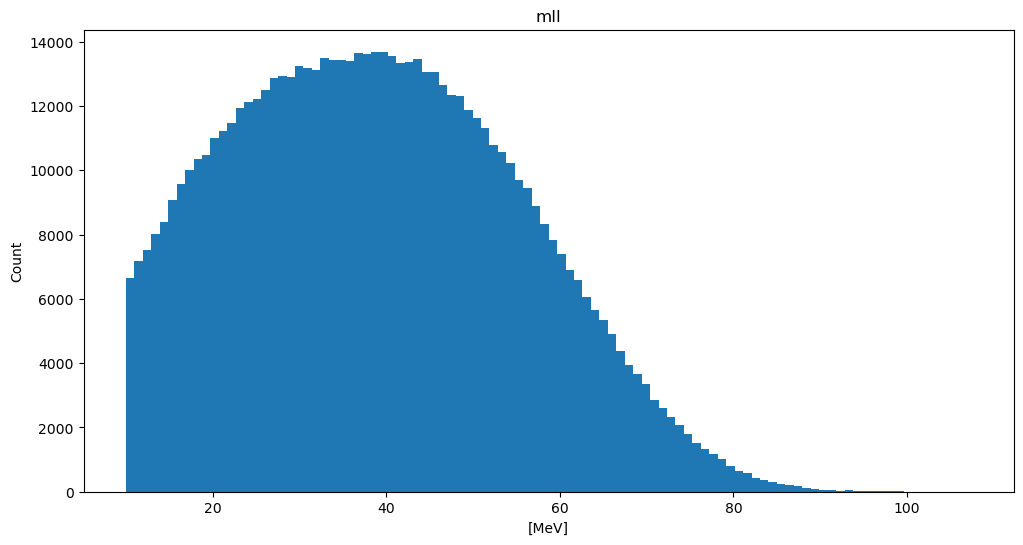

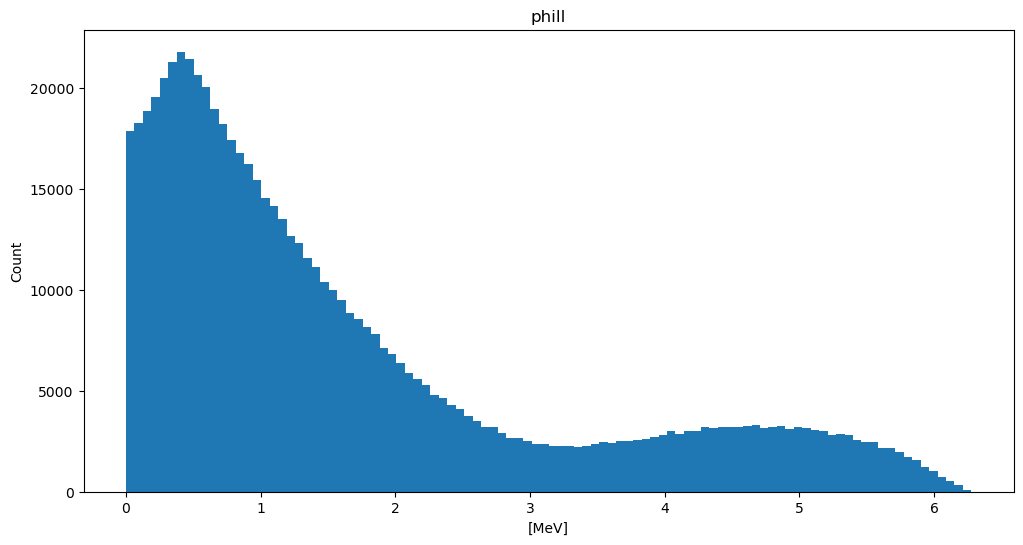

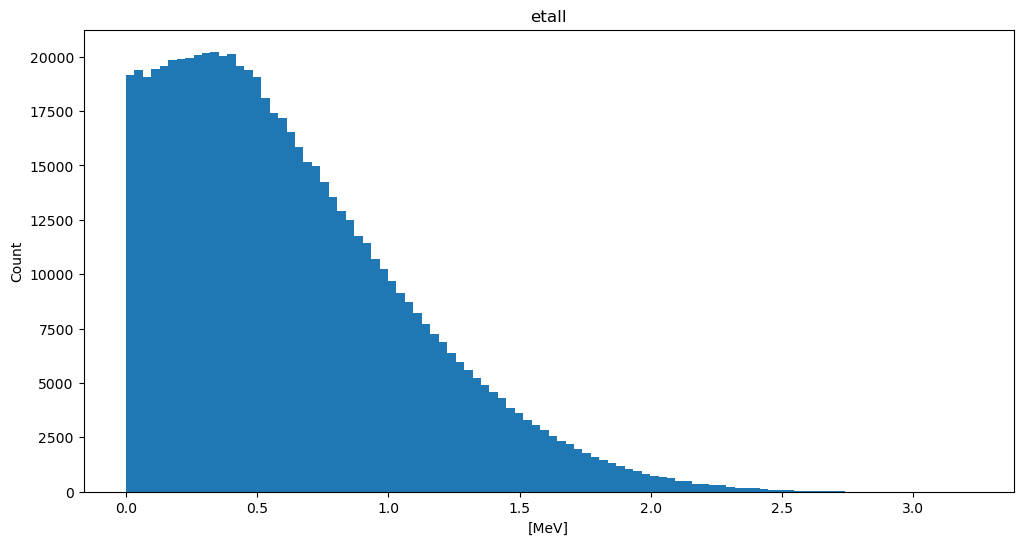

In [43]:
# check with paper

cut_pre_pt_lead = Truth_lead_lep.pt > 22  # 22 ~ 40 (SY)
print(len(Truth_lead_lep.energy) - np.sum(cut_pre_pt_lead * 1))
cut_pre_pt_sub = Truth_sublead_lep().pt > 15
print(len(Truth_lead_lep.energy) - np.sum(cut_pre_pt_sub * 1))
cut_pre_dilep_m = (
    np.sqrt(
        np.square(Truth_lead_lep.energy + Truth_sublead_lep().energy)
        - np.square(Truth_lead_lep.px + Truth_sublead_lep().px)
        - np.square(Truth_lead_lep.py + Truth_sublead_lep().py)
        - np.square(Truth_lead_lep.pz + Truth_sublead_lep().pz)
    )
    > 10
)
print(len(Truth_lead_lep.energy) - np.sum(cut_pre_dilep_m * 1))
met = Truth_lead_nu.p4 + Truth_sublead_nu.p4
cut_pre_pt_miss = pt(met[:, 0], met[:, 1]) > 20
print(len(Truth_lead_lep.energy) - np.sum(cut_pre_pt_miss * 1))
PRE_CUT = cut_pre_pt_lead & cut_pre_pt_sub & cut_pre_dilep_m & cut_pre_pt_miss
print(len(Truth_lead_lep.energy) - np.sum(PRE_CUT * 1))
tl_mask = ~np.isnan(Truth_dilep().m)
print("Time-like ratio:", np.sum(tl_mask) / len(tl_mask))
mask = PRE_CUT & tl_mask

mll = Truth_dilep().m[mask]
phill = Truth_dilep().dphi[mask]
etall = Truth_dilep().deta[mask]
test_plot(mll, "mll")
test_plot(phill, "phill")
test_plot(etall, "etall")

574773
586305
687434
130242
1025725
Time-like ratio: 0.7309476430184872


/tmp/ipykernel_8615/3701315204.py:7: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(


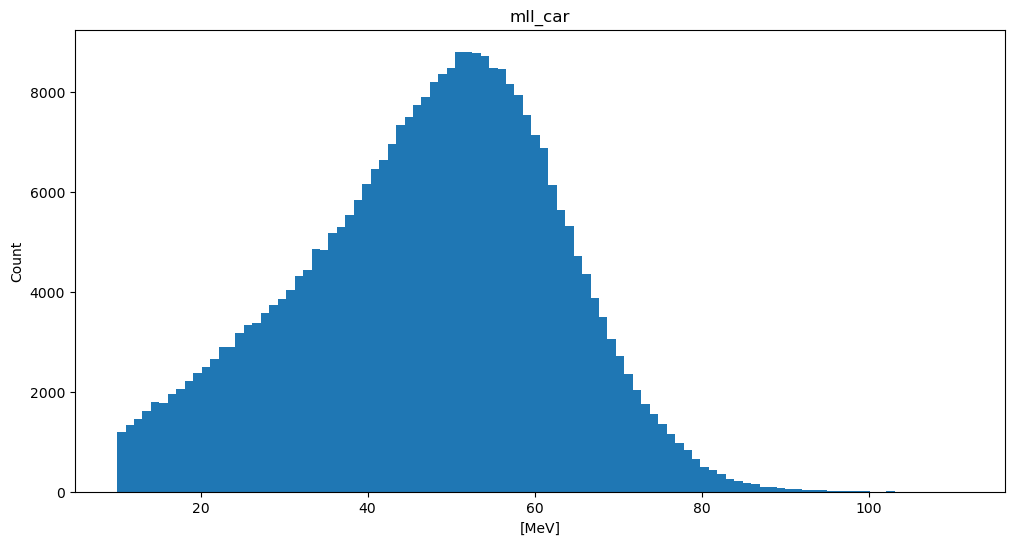

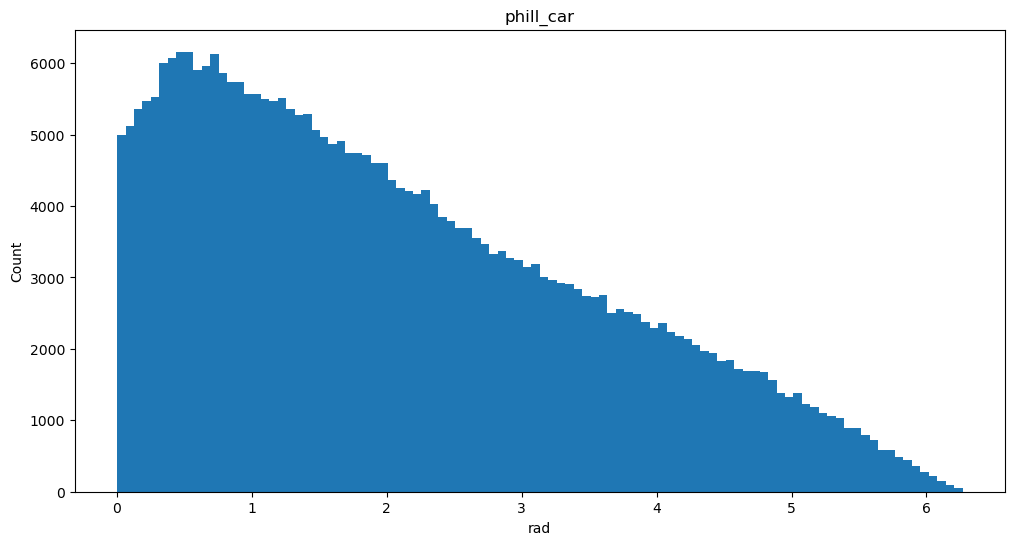

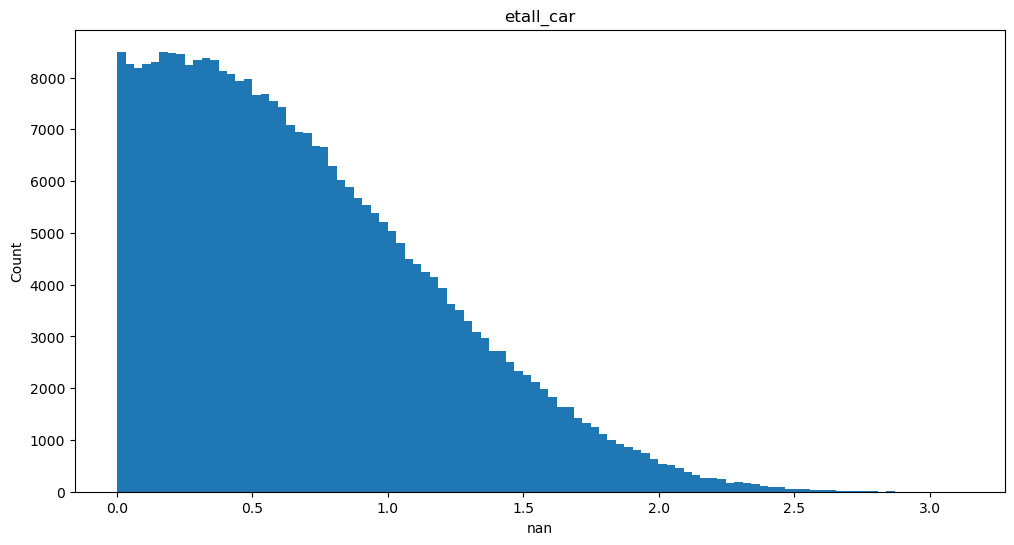

In [44]:
# check with paper
cut_pre_pt_lead = Truth_lead_lep_CAR.pt > 22  # 22 ~ 40 (SY)
print(len(Truth_lead_lep_CAR.energy) - np.sum(cut_pre_pt_lead * 1))
cut_pre_pt_sub = Truth_sublead_lep_CAR().pt > 15
print(len(Truth_lead_lep_CAR.energy) - np.sum(cut_pre_pt_sub * 1))
cut_pre_dilep_m = (
    np.sqrt(
        np.square(Truth_lead_lep_CAR.energy + Truth_sublead_lep_CAR().energy)
        - np.square(Truth_lead_lep_CAR.px + Truth_sublead_lep_CAR().px)
        - np.square(Truth_lead_lep_CAR.py + Truth_sublead_lep_CAR().py)
        - np.square(Truth_lead_lep_CAR.pz + Truth_sublead_lep_CAR().pz)
    )
    > 10
)
print(len(Truth_lead_lep_CAR.energy) - np.sum(cut_pre_dilep_m * 1))
met = Truth_lead_nu.p4 + Truth_sublead_nu.p4  # remain the same as truth
cut_pre_pt_miss = pt(met[:, 0], met[:, 1]) > 20
print(len(Truth_lead_lep_CAR.energy) - np.sum(cut_pre_pt_miss * 1))
PRE_CUT = cut_pre_pt_lead & cut_pre_pt_sub & cut_pre_dilep_m & cut_pre_pt_miss
print(len(Truth_lead_lep_CAR.energy) - np.sum(PRE_CUT * 1))
tl_mask_car = ~np.isnan(Truth_dilep_CAR().m)
mask_car = PRE_CUT & tl_mask_car
print("Time-like ratio:", np.sum(tl_mask_car) / len(tl_mask_car))

mll_car = Truth_dilep_CAR().m[mask_car]
phill_car = Truth_dilep_CAR().dphi[mask_car]
etall_car = Truth_dilep_CAR().deta[mask_car]
test_plot(mll_car, "mll_car")
test_plot(phill_car, "phill_car", xlabel="rad")
test_plot(etall_car, "etall_car", xlabel="nan")

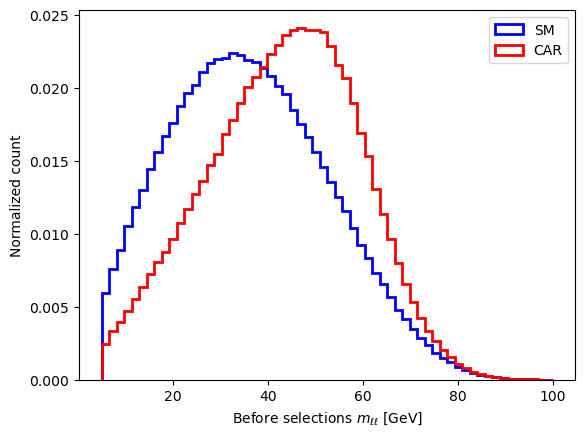

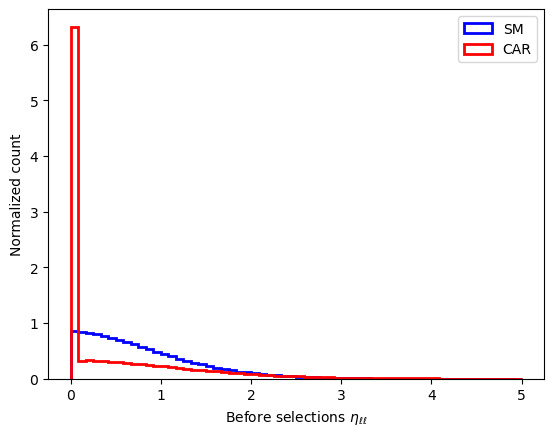

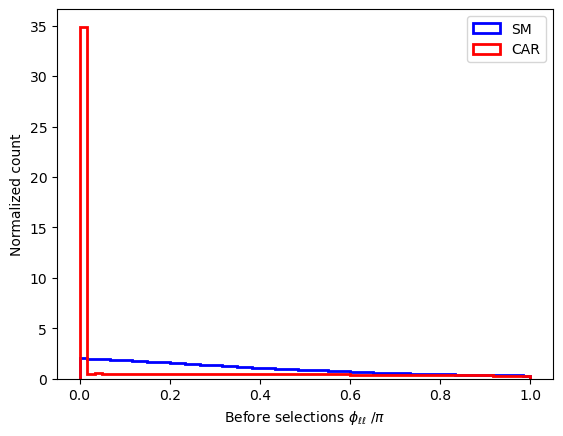

In [45]:
fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(5, 100, 61)
plt.hist(
    Truth_dilep().m,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM",
    density=True,
)
plt.hist(
    Truth_dilep_CAR().m,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="CAR",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"Before selections $m_{\ell \ell}$ [GeV]")
plt.ylabel("Normalized count")
plt.show()

fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 5, 61)
plt.hist(
    Truth_dilep().deta,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM",
    density=True,
)
plt.hist(
    Truth_dilep_CAR().deta,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="CAR",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"Before selections $\eta_{\ell \ell}$")
plt.ylabel("Normalized count")
plt.show()

fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 1, 61)
plt.hist(
    Truth_dilep().dphi / np.pi,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM",
    density=True,
)
plt.hist(
    Truth_dilep_CAR().dphi / np.pi,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="CAR",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"Before selections $\phi_{\ell \ell}\ / \pi$")
plt.ylabel("Normalized count")
plt.show()

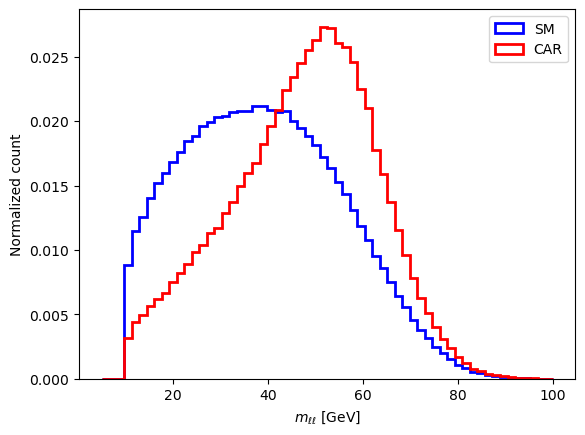

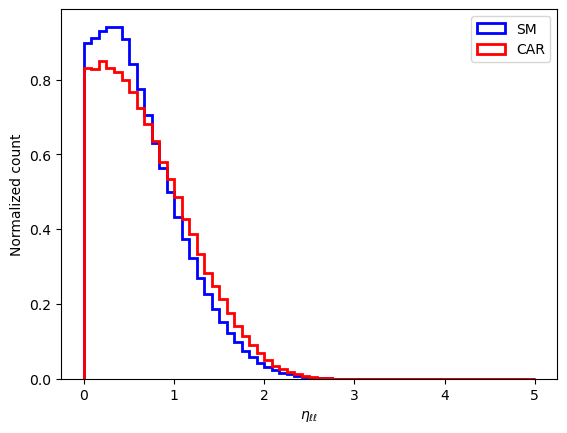

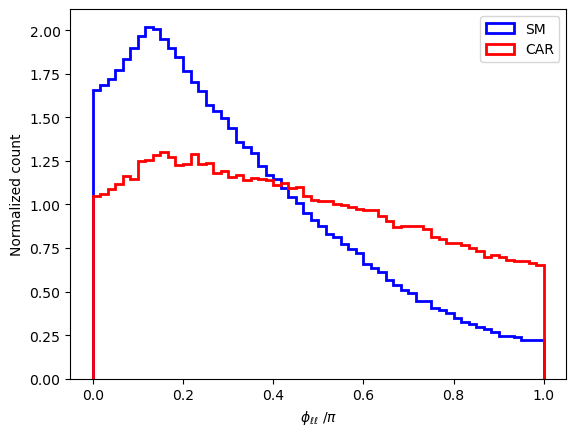

In [46]:
# selected with effective events and preselections

fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(5, 100, 61)
plt.hist(
    mll,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM",
    density=True,
)
plt.hist(
    mll_car,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="CAR",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"$m_{\ell \ell}$ [GeV]")
plt.ylabel("Normalized count")
plt.show()

fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 5, 61)
plt.hist(
    etall,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM",
    density=True,
)
plt.hist(
    etall_car,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="CAR",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"$\eta_{\ell \ell}$")
plt.ylabel("Normalized count")
plt.show()

fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 1, 61)
plt.hist(
    phill / np.pi,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM",
    density=True,
)
plt.hist(
    phill_car / np.pi,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="CAR",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"$\phi_{\ell \ell}\ / \pi$")
plt.ylabel("Normalized count")
plt.show()